<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Gustavo-Villa/blob/main/Actividad6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gustavo Guerrero Villa

Ciencia y analítica de datos 

1 de noviembre de 2022

**Actividad Semanal -- 6**


**Data Set Information:**

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [1]:
#Importación de paquetes y datos
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col="ID")


In [2]:
#Shape
print(np.shape(df))

(30000, 24)


In [3]:
#Columns
columns = df.columns
print(columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')


In [4]:
#Head
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


In [5]:
#dtypes
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [6]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [7]:
#Para tener un mejor manejo de nuestras variables reescribimos su nombre
df.rename(columns = {'X1' : 'Given Credit', 'X2' : 'Gender', 'X3' : 'Education', 'X4' : 'Marital_Status', 'X5' : 'Age', 'X6' : 'Repayment_Sept', 'X7' : 'Repayment_Aug', 'X8' : 'Repayment_July', 'X9' : 'Repayment_June', 'X10' : 'Repayment_May', 'X11' : 'Repayment_Apr', 'X12' : 'Bill_Statement_Sept', 'X13' : 'Bill_Statement_Aug', 'X14' : 'Bill_Statement_July', 'X15' : 'Bill_Statement_June', 'X16' : 'Bill_Statement_May', 'X17' : 'Bill_Statement_April', 'X18' : 'Amount_Paid_Sept', 'X19' : 'Amount_Paid_Aug', 'X20' : 'Amount_Paid_July', 'X21' : 'Amount_Paid_June', 'X22' : 'Amount_Paid_May', 'X23' : 'Amount_Paid_Apr'}, inplace = True)

In [8]:
#Verificamos las variables donde hayan valores NA
df.isna().any()

Given Credit            False
Gender                   True
Education                True
Marital_Status           True
Age                      True
Repayment_Sept           True
Repayment_Aug            True
Repayment_July           True
Repayment_June           True
Repayment_May            True
Repayment_Apr            True
Bill_Statement_Sept      True
Bill_Statement_Aug       True
Bill_Statement_July      True
Bill_Statement_June      True
Bill_Statement_May       True
Bill_Statement_April     True
Amount_Paid_Sept         True
Amount_Paid_Aug          True
Amount_Paid_July         True
Amount_Paid_June         True
Amount_Paid_May          True
Amount_Paid_Apr          True
Y                        True
dtype: bool

In [9]:
df.isna().sum()

Given Credit             0
Gender                   1
Education                2
Marital_Status           2
Age                      5
Repayment_Sept           3
Repayment_Aug            5
Repayment_July           7
Repayment_June           9
Repayment_May           16
Repayment_Apr           14
Bill_Statement_Sept     11
Bill_Statement_Aug      11
Bill_Statement_July     13
Bill_Statement_June     15
Bill_Statement_May      17
Bill_Statement_April    10
Amount_Paid_Sept         8
Amount_Paid_Aug          9
Amount_Paid_July         8
Amount_Paid_June        11
Amount_Paid_May         11
Amount_Paid_Apr          5
Y                        3
dtype: int64

In [10]:
#Hacemos una copia para la limpieza
ndf = df.copy()
ndf

,Given Credit,Gender,Education,Marital_Status,Age,Repayment_Sept,Repayment_Aug,Repayment_July,Repayment_June,Repayment_May,...,Bill_Statement_June,Bill_Statement_May,Bill_Statement_April,Amount_Paid_Sept,Amount_Paid_Aug,Amount_Paid_July,Amount_Paid_June,Amount_Paid_May,Amount_Paid_Apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [11]:
#soltaremos filas donde haya más de 1 valors NA
ndf.dropna(thresh=1, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df


In [12]:
#Imputamos usando la media 
ndf['Age'].fillna(value = ndf.Age.mean(), 
                    inplace = True)

In [13]:
#Imputamos ahora nuestra variable Education con base en la mediana, hace sentido al ser una variable categórica
ndf['Education'].fillna(value = ndf.Education.median(), 
                    inplace = True)

In [14]:
#Imputamos ahora nuestra variable Gender con base en la mediana, hace sentido al ser una variable categórica
ndf['Gender'].fillna(value = ndf.Gender.median(), 
                    inplace = True)

In [15]:
#Imputamos ahora nuestra variable Marital_Status con base en la mediana, hace sentido al ser una variable categórica
ndf['Marital_Status'].fillna(value = ndf.Marital_Status.median(), 
                    inplace = True)

In [16]:
ndf = ndf.dropna()

In [17]:
#Estadística descriptiva del dataframe
ndf.describe()

,Given Credit,Gender,Education,Marital_Status,Age,Repayment_Sept,Repayment_Aug,Repayment_July,Repayment_June,Repayment_May,...,Bill_Statement_June,Bill_Statement_May,Bill_Statement_April,Amount_Paid_Sept,Amount_Paid_Aug,Amount_Paid_July,Amount_Paid_June,Amount_Paid_May,Amount_Paid_Apr,Y
count,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000,...,29961.000000,29961.000000,29961.000000,29961.000000,2.996100e+04,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,167570.831414,1.604052,1.853042,1.551784,35.483444,-0.017156,-0.134041,-0.166783,-0.221121,-0.266847,...,43279.742465,40329.126631,38888.917025,5666.635693,5.926206e+03,5228.981109,4830.090851,4802.842629,5220.932879,0.221154
std,129747.726791,0.489062,0.790463,0.522009,9.213857,1.123947,1.197122,1.195977,1.168370,1.132296,...,64363.745973,60825.064775,59580.737846,16572.172269,2.305530e+04,17617.072002,15675.706098,15287.267034,17788.331077,0.415031
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.000000,1762.000000,1256.000000,1000.000000,8.350000e+02,390.000000,296.000000,253.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19038.000000,18104.000000,17067.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54558.000000,50222.000000,49235.000000,5007.000000,5.000000e+03,4512.000000,4015.000000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Las medidas de centralidad nos ayudan a entender en que punto se centra la distribución de los valores de nuestras variables mientras que las de dispersión nos ayudan a ver que tan conecntradas o cuanta variabilidad podremos observar dentro de nuestros valores.


In [18]:
#Categorical variables count  
ndf['Gender'].value_counts(dropna=True)

2.0    18098
1.0    11863
Name: Gender, dtype: int64

In [19]:
ndf['Education'].value_counts(dropna=True)

2.0    14010
1.0    10574
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: Education, dtype: int64

In [20]:
ndf['Marital_Status'].value_counts(dropna=True)

2.0    15940
1.0    13644
3.0      323
0.0       54
Name: Marital_Status, dtype: int64

In [21]:
pcs = PCA()
pcs.fit(ndf)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,166584.932183,6.105529e-01,0.610553
1,115830.991378,2.951898e-01,0.905743
2,37255.752340,3.053785e-02,0.936281
3,27746.689828,1.693847e-02,0.953219
4,20697.811581,9.425420e-03,0.962644
5,20277.839617,9.046805e-03,0.971691
6,18522.309952,7.548178e-03,0.979239
7,17039.643443,6.388117e-03,0.985628
8,16293.308976,5.840774e-03,0.991468
9,11615.171993,2.968268e-03,0.994437


In [22]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Standard deviation,166584.93,115830.99,37255.75,27746.69,20697.81,20277.84,18522.31,17039.64,16293.31,11615.17,...,2.07,0.94,0.75,0.73,0.6,0.51,0.49,0.46,0.42,0.39
Proportion of variance,0.61,0.30,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
Cumulative proportion,0.61,0.91,0.94,0.95,0.96,0.97,0.98,0.99,0.99,0.99,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


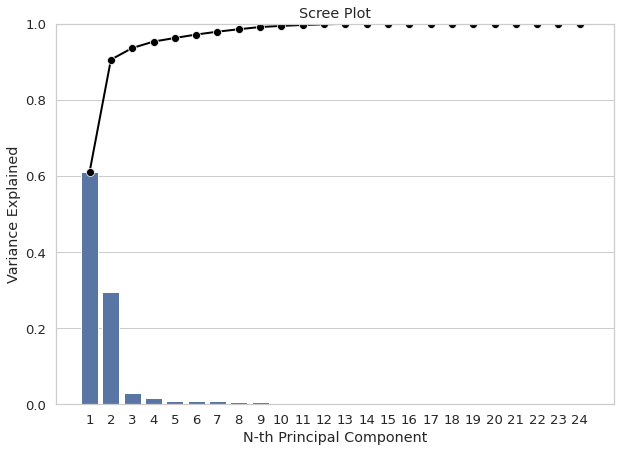

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [24]:
print("First 3 components: ", ((pcsSummary.iloc[2][2])*100).round(0))
print("First 2 components: ", ((pcsSummary.iloc[2][1])*100).round(0))

First 3 components:  94.0
First 2 components:  91.0


**Los primeros dos componentes representan la mayor parte de la variación de sus datos**

In [25]:
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,166584.9322,115830.9914,37255.7523,27746.6898,20697.8116,20277.8396,18522.3100,17039.6434,16293.3090,11615.1720,...,2.0653,0.9413,0.7532,0.7324,0.5964,0.5122,0.494,0.4599,0.4186,0.3855
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0000


In [26]:
pcs.components_

array([[ 4.91168855e-01, -3.59159667e-08, -3.67197592e-07,
        -1.92018069e-07,  5.56462339e-06,  3.43905574e-07,
         5.70121795e-07,  5.84410051e-07,  6.67285542e-07,
         7.61050316e-07,  8.37691489e-07,  3.88567222e-01,
         3.81471606e-01,  3.72290492e-01,  3.46492555e-01,
         3.22994553e-01,  3.08645737e-01,  2.65704256e-02,
         3.12836282e-02,  2.68139372e-02,  2.21662039e-02,
         2.22001104e-02,  2.48049200e-02, -1.75716762e-07],
       [ 8.69259499e-01,  1.74287081e-07, -1.50012562e-06,
        -4.00279991e-07,  8.28708888e-06, -3.80399066e-06,
        -4.61997344e-06, -4.49819838e-06, -4.25751397e-06,
        -4.02892638e-06, -3.98192337e-06, -2.21178600e-01,
        -2.26198782e-01, -2.16346209e-01, -1.93872755e-01,
        -1.76631000e-01, -1.67210789e-01,  5.74211505e-03,
         1.08101072e-02,  1.09897237e-02,  1.03852817e-02,
         1.17148177e-02,  1.53649181e-02, -5.07164839e-07],
       [-2.05882735e-02,  3.26360381e-07, -9.71825911e

In [27]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = df.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
Given Credit,4.911689e-01,8.692595e-01,-2.058827e-02,-1.843978e-02,-4.413362e-02
Gender,-3.591597e-08,1.742871e-07,3.263604e-07,-2.476775e-08,-3.672449e-07
Education,-3.671976e-07,-1.500126e-06,-9.718259e-07,2.075697e-07,4.530134e-07
Marital_Status,-1.920181e-07,-4.002800e-07,7.339541e-08,9.590517e-08,6.621284e-07
Age,5.564623e-06,8.287089e-06,-4.104943e-06,-2.468132e-07,-4.920048e-06
Repayment_Sept,3.439056e-07,-3.803991e-06,-4.158044e-07,-2.624738e-06,-3.363107e-06
Repayment_Aug,5.701218e-07,-4.619973e-06,-5.827900e-07,-2.668088e-06,-2.040162e-06
Repayment_July,5.844101e-07,-4.498198e-06,5.110443e-07,-1.786016e-06,-3.622503e-06
Repayment_June,6.672855e-07,-4.257514e-06,2.097679e-06,2.234131e-07,-4.425294e-06
Repayment_May,7.610503e-07,-4.028926e-06,3.451835e-06,-8.774276e-07,-4.181417e-06


In [28]:
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Given Credit,4.911689e-01,8.692595e-01,-2.058827e-02,-1.843978e-02,-4.413362e-02,1.689904e-02,-1.131134e-03,1.034644e-03,9.470182e-03,3.763319e-03,...,0.000008,-5.763790e-07,1.436864e-06,-3.829979e-07,-2.024682e-07,-3.399519e-08,3.767215e-07,2.556534e-07,4.455530e-08,-9.821839e-08
Gender,-3.591597e-08,1.742871e-07,3.263604e-07,-2.476775e-08,-3.672449e-07,2.013398e-07,1.719126e-07,1.761936e-07,-1.320555e-07,1.184089e-07,...,-0.015321,1.223517e-02,5.638234e-02,-2.474343e-02,-9.930109e-03,-8.320842e-02,-8.259613e-01,5.512934e-01,-2.361986e-02,-4.562464e-02
Education,-3.671976e-07,-1.500126e-06,-9.718259e-07,2.075697e-07,4.530134e-07,9.443963e-08,-6.336662e-07,-4.147995e-08,1.690602e-07,-2.984900e-07,...,0.016144,-2.551320e-02,9.705064e-01,-2.046213e-01,-1.487835e-02,-1.004174e-02,1.075622e-01,5.026802e-02,3.431641e-03,-2.404231e-02
Marital_Status,-1.920181e-07,-4.002800e-07,7.339541e-08,9.590517e-08,6.621284e-07,-2.886575e-07,1.681664e-07,-4.013760e-07,-2.986970e-07,-2.535511e-08,...,-0.002424,1.308008e-02,-9.957286e-02,2.231082e-02,1.574536e-02,8.328234e-03,5.478203e-01,8.258214e-01,-1.177839e-02,-7.957877e-02
Age,5.564623e-06,8.287089e-06,-4.104943e-06,-2.468132e-07,-4.920048e-06,1.566927e-06,-1.487738e-06,-2.039421e-06,6.935730e-06,-1.920125e-07,...,0.004321,2.116110e-03,-1.951701e-02,4.442520e-03,2.183022e-04,-5.531918e-05,6.463737e-03,2.117039e-02,-8.840097e-04,1.062258e-04
Repayment_Sept,3.439056e-07,-3.803991e-06,-4.158044e-07,-2.624738e-06,-3.363107e-06,2.181815e-06,-1.793800e-06,7.866455e-07,-8.314277e-07,2.305792e-06,...,0.327665,-6.280415e-01,-1.451621e-01,-6.054891e-01,2.742944e-01,-1.408082e-01,6.411315e-03,1.302652e-02,-2.345690e-02,1.211794e-01
Repayment_Aug,5.701218e-07,-4.619973e-06,-5.827900e-07,-2.668088e-06,-2.040162e-06,2.111176e-06,-2.630337e-06,6.873515e-07,-2.074935e-06,1.213891e-06,...,0.415447,-4.298710e-01,4.028710e-02,2.890031e-01,-5.817946e-01,4.519166e-01,-3.663314e-02,3.763571e-02,1.094948e-01,2.149195e-03
Repayment_July,5.844101e-07,-4.498198e-06,5.110443e-07,-1.786016e-06,-3.622503e-06,9.994364e-07,3.629218e-06,1.360387e-07,-1.919818e-06,3.746819e-07,...,0.441356,-1.119777e-01,1.015719e-01,5.560875e-01,1.479401e-01,-6.211778e-01,3.374850e-02,-2.023511e-02,-2.517010e-01,2.146600e-02
Repayment_June,6.672855e-07,-4.257514e-06,2.097679e-06,2.234131e-07,-4.425294e-06,2.458943e-06,8.418678e-07,1.266720e-06,-2.735962e-06,2.391599e-06,...,0.441167,2.344527e-01,4.359121e-02,1.461990e-01,5.751326e-01,3.250486e-01,-4.603868e-02,2.131569e-02,5.365501e-01,-1.521244e-02
Repayment_May,7.610503e-07,-4.028926e-06,3.451835e-06,-8.774276e-07,-4.181417e-06,-9.078344e-07,-8.211264e-07,-6.758914e-07,-1.921756e-06,4.285424e-06,...,0.416942,3.880237e-01,-2.874319e-02,-1.972301e-01,4.616565e-02,3.462820e-01,-1.704435e-02,-4.076829e-03,-7.161873e-01,2.427613e-02


In [29]:
pcsComponents_df_abs = np.abs(pcsComponents_df)

pcsComponents_df_abs.idxmax()

PC1            Given Credit
PC2            Given Credit
PC3     Bill_Statement_Sept
PC4         Amount_Paid_Aug
PC5        Amount_Paid_June
PC6        Amount_Paid_July
PC7        Amount_Paid_Sept
PC8         Amount_Paid_May
PC9         Amount_Paid_Apr
PC10       Amount_Paid_June
PC11       Amount_Paid_July
PC12     Bill_Statement_Aug
PC13     Bill_Statement_May
PC14                    Age
PC15         Repayment_July
PC16         Repayment_Sept
PC17              Education
PC18         Repayment_Sept
PC19          Repayment_Aug
PC20         Repayment_July
PC21                 Gender
PC22         Marital_Status
PC23          Repayment_May
PC24                      Y
dtype: object

En el cuadro anterior se representa qué variable original es cada uno de los componentes originales, según su magnitud.

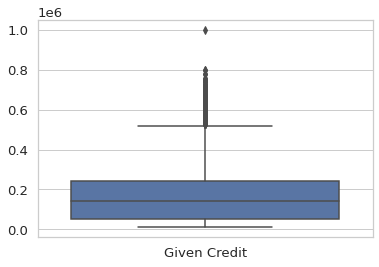

In [30]:
sns.boxplot(data=df.iloc[:,:1])

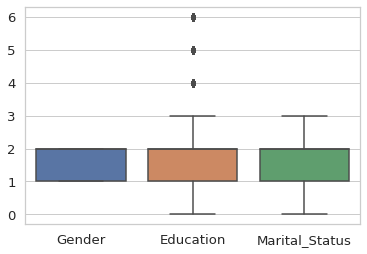

In [31]:
sns.boxplot(data=df.iloc[:,1:4])

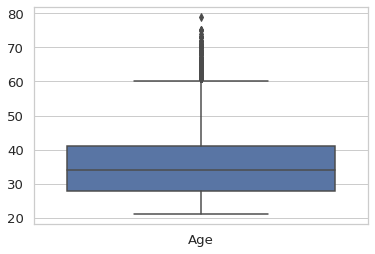

In [32]:
sns.boxplot(data=df.iloc[:,4:5])

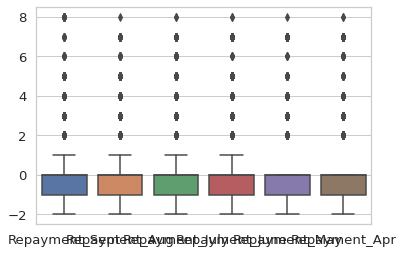

In [33]:
sns.boxplot(data=df.iloc[:,5:11])

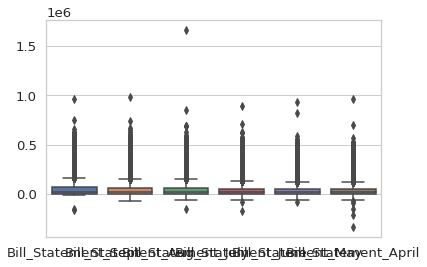

In [34]:
sns.boxplot(data=df.iloc[:,11:17])

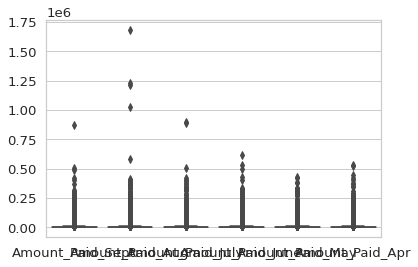

In [35]:
sns.boxplot(data=df.iloc[:,17:23])

En las gráficas anteriores se pueden apreciar todos los valores atípicos. Se usaron diferentes gráficas para poder apreciar mejor las escalas.


Hay un 92% de la variabilidad total. Al quitar esta variable, el conjunto de datos será más preciso y se logrará un entrenamiento mucho mejor.

Hay que tener cuidado al utilizar un método de reducción de dimensiones como el PCA se pierde cierta capacidad de interpretación de las variables en los diferentes componentes

La variable que cuenta con la mayor importancia ante los componentes principales es la cantidad de crédito otorgado, y la variable que cuenta con menor importancia ante los componentes principales es si se otorgó el crédito o si no se otorgó el mismo.

**Relevant Papers:**

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.



**Citation Request:**

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
